**Tugas K-Means** 
_ Penambangan Data SIDE GAB02
_Aanisah Rifda R
_1301174057

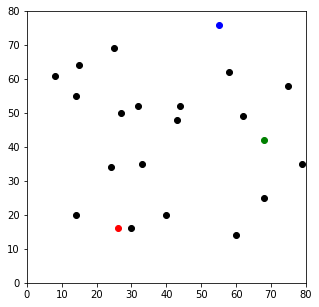

In [0]:
#Initialisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib.inline

df = pd.DataFrame({
    'x':[14, 25, 30, 40, 24, 79, 27, 8, 14, 60, 75, 43, 15, 33, 58, 32, 44, 62, 68],
    'y':[55, 69, 16 , 20, 34, 35, 50, 61, 20, 14, 58, 48, 64, 35, 62, 52, 52, 49, 25]
})

np.random.seed(200)
k = 3
#centroids[i] = [x,y]
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  14  55        40.804412        55.542776        46.065171        1     r
1  25  69        53.009433        50.774009        30.805844        3     b
2  30  16         4.000000        46.043458        65.000000        1     r
3  40  20        14.560220        35.608988        57.974132        1     r
4  24  34        18.110770        44.721360        52.201533        1     r


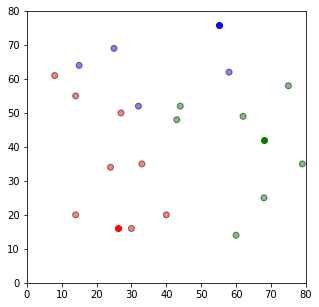

In [0]:
# Assignment Stage

def assignment(df, centroid):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroid.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()


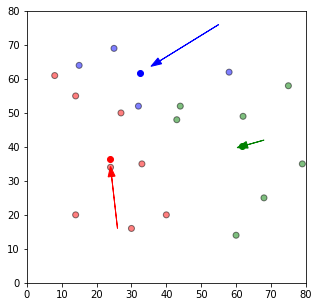

In [0]:
# Update Stage

import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

centroids = update(centroids)

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

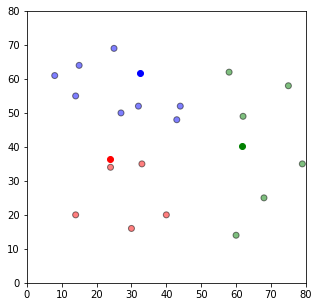

In [0]:
# Repeat Assignment Stage

df = assignment(df, centroids)

#Plot result
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

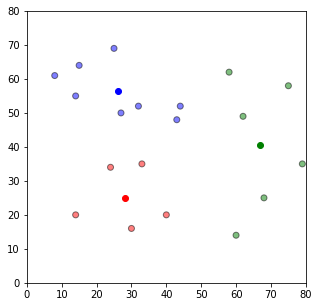

In [0]:
#Continue until all assigned categories don't change anymore

while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [0]:
df = pd.DataFrame({
    'x':[14, 25, 30, 40, 24, 79, 27, 8, 14, 60, 75, 43, 15, 33, 58, 32, 44, 62, 68],
    'y':[55, 69, 16 , 20, 34, 35, 50, 61, 20, 14, 58, 48, 64, 35, 62, 52, 52, 49, 25]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

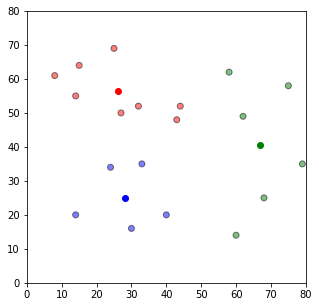

In [0]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()